In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style="ticks", palette="pastel")
sns.set(style="ticks", font_scale=1.3)
plt.style.use('bmh')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.5


In [4]:

def plot_times(dn, mthd, num_idx):
    dfs = []
    for J in ['0.0', '0.1', '0.01', '0.001', '0.0001', '1.0']:
        try:
            runs = []
            ts = []
            num_ps = []
            num_cs = []
            t = 0
            r = 0
            for index in range(1, num_idx+1):
                with open('../logs/{}_{}_{}/log_{}.txt'
                          .format(dn, J, mthd, index)) as f:
                    for num, line in enumerate(f):
                        if num == 2:
                            tmps = line.strip().split(' ')
                            rho = float(tmps[2])
                        elif num == 6:
                            tmps = line.strip().split(' ')
                            num_p = float(tmps[2])
                        elif num == 8:
                            tmps = line.strip().split(' ')
                            num_c = float(tmps[2])
                        elif num == 10:
                            tmps = line.strip().split(' ')
                            t = float(tmps[2])

#                     runs.append(r)
#                     ts.append(t)
                    num_ps.append(num_p)
                    num_cs.append(num_c)
#             if J == '1':
#                 J = int(J)
#             elif J == '0.1':
#                 J = float(J)
#             else:
#                 J = float('0.{}'.format(J))
            
            Js = [float(J)] * len(num_ps * 2)
            
            df1 = pd.DataFrame({
                'number': num_ps + num_cs,
                r'$\varrho$': Js,
                'node type': ['Parent'] * len(num_ps) + ['Child'] * len(num_cs)
            })

#             print(df1.describe())
            dfs.append(df1)
        except:
            pass
    
    if len(dfs) == 1:
        df = dfs[0]
    else:
        df = pd.concat(dfs, ignore_index=True)
    
    plt.figure(figsize=(7., 4.8))
    sns.boxplot(x=r"$\varrho$", y="number",
                hue="node type", 
#                 palette=["y", "b"],
                palette=['#2a9df4', '#ffa31a'],
                width=0.5,
#                 saturation=.7,
                data=df,)
#     plt.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1)

    sns.despine(offset=5, trim=True)
    plt.ylim(0,)
    
    plt.tight_layout()
    plt.savefig('num_nodes_{}.pdf'.format(mthd))
    plt.savefig('num_nodes_{}.eps'.format(mthd))
#     plt.close()
    return df
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


number  $\varrho$ node type
0      26.0        0.0    Parent
1      27.0        0.0    Parent
2      12.0        0.0    Parent
3      10.0        0.0    Parent
4      30.0        0.0    Parent
..      ...        ...       ...
355     6.0        1.0     Child
356     5.0        1.0     Child
357     6.0        1.0     Child
358     6.0        1.0     Child
359     4.0        1.0     Child

[360 rows x 3 columns]

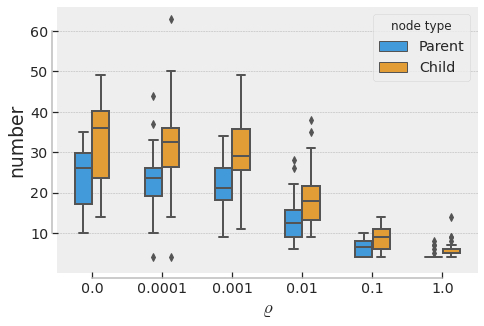

In [7]:
plot_times("AAAI", 'srvi', 30)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


number  $\varrho$ node type
0      26.0        0.0    Parent
1      18.0        0.0    Parent
2      20.0        0.0    Parent
3      40.0        0.0    Parent
4      29.0        0.0    Parent
..      ...        ...       ...
355     4.0        1.0     Child
356     4.0        1.0     Child
357     4.0        1.0     Child
358     4.0        1.0     Child
359     4.0        1.0     Child

[360 rows x 3 columns]

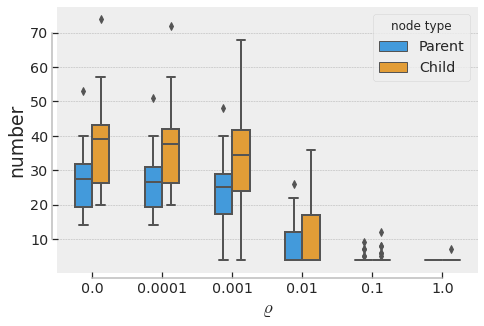

In [16]:
plot_times("AAAI", 'rvi', 30)
